In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing
import seaborn as sns

In [2]:
df = pd.read_csv("/home/andreas/Desktop/Cyberlens/Pre-interview_assessment/vulnerable_robot_challenge.csv")

In [3]:
df.tail()

,t,CPU,RxKBTot,TxKBTot,WriteKBTot,Watts,Amps,RMS,diff_encoder_l,flag
8931,228.70,26.0,1.0,1.0,0.0,97.916549,0.613917,0.077518,22.0,0
8932,228.72,26.0,1.0,1.0,0.0,97.912513,0.613937,0.201864,22.0,0
8933,228.74,26.0,1.0,1.0,0.0,97.908476,0.613958,0.084871,22.0,0
8934,228.76,26.0,1.0,1.0,0.0,97.904440,0.613978,0.133019,22.0,0
8935,228.78,26.0,1.0,1.0,0.0,97.900404,0.613998,0.090383,22.0,0


In [4]:
df[df.columns].isnull().sum()

t                 0
CPU               0
RxKBTot           0
TxKBTot           0
WriteKBTot        0
Watts             0
Amps              0
RMS               0
diff_encoder_l    0
flag              0
dtype: int64

In [5]:
df.columns

Index(['t', 'CPU', 'RxKBTot', 'TxKBTot', 'WriteKBTot', 'Watts', 'Amps', 'RMS',
       'diff_encoder_l', 'flag'],
      dtype='object')

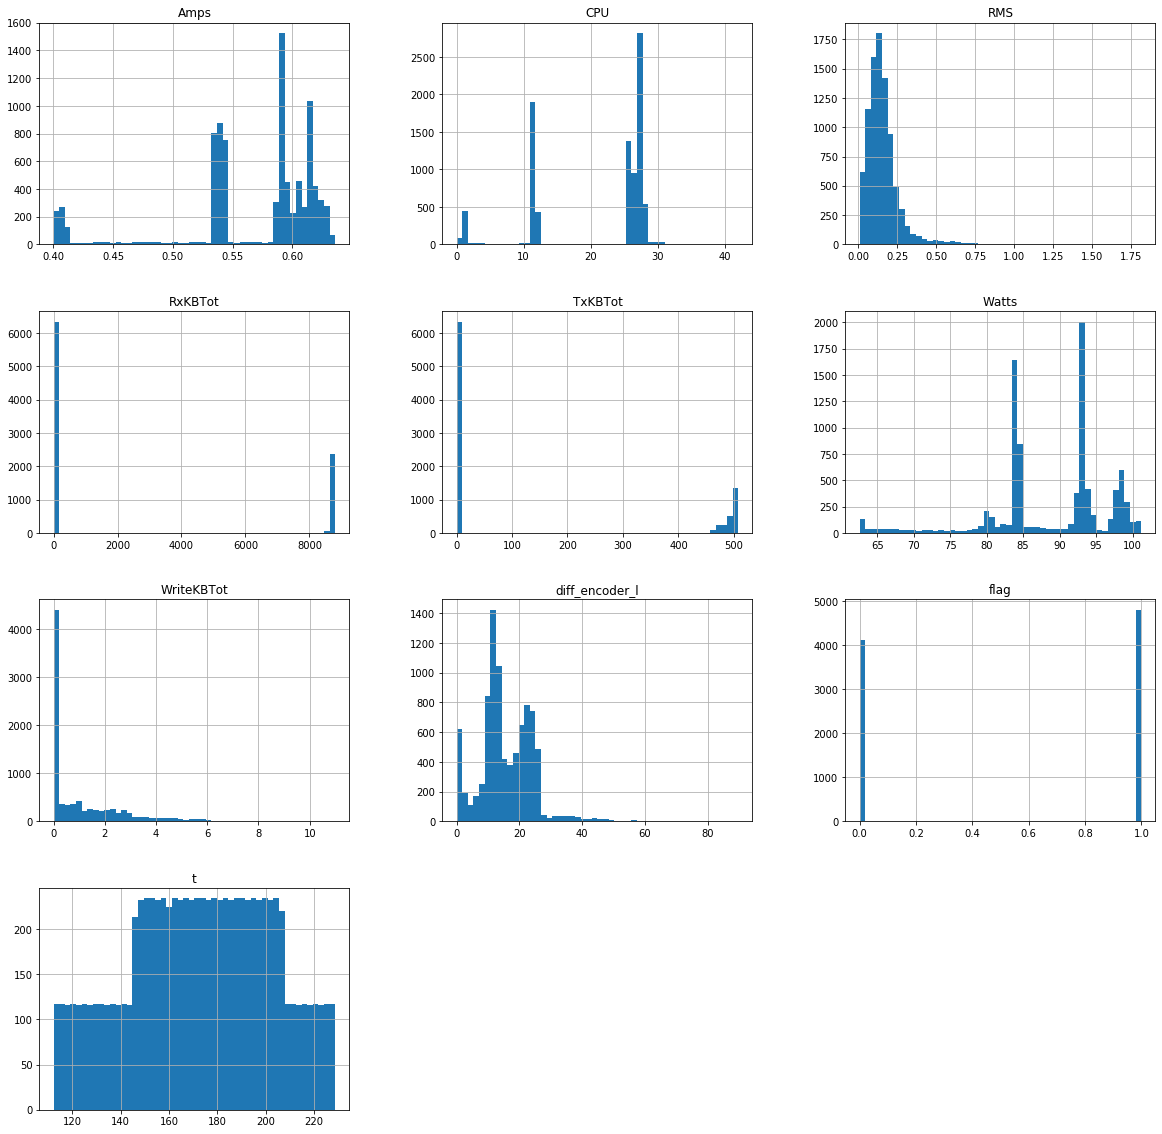

In [6]:
df.hist(bins = 50, figsize = (20,20))
plt.show()

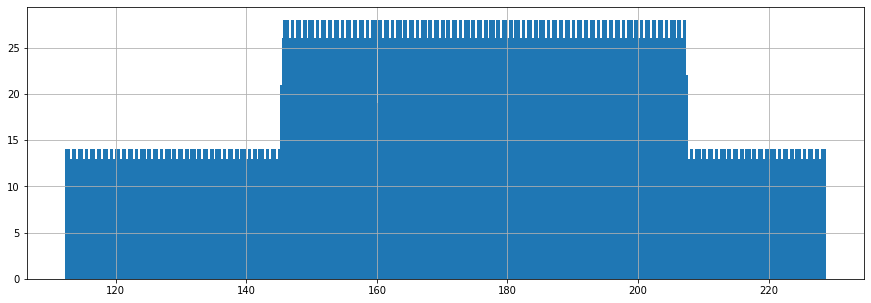

In [7]:
df['t'].hist(bins = 425, figsize = (15,5))
plt.show()

In [8]:
normal = df.loc[df['flag'] == 0, :]
normal.describe()

,t,CPU,RxKBTot,TxKBTot,WriteKBTot,Watts,Amps,RMS,diff_encoder_l,flag
count,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.000000,4132.0
mean,171.991452,23.350803,244.917846,14.778896,0.923035,89.733106,0.566935,0.158382,17.305770,0.0
std,33.230427,9.146263,1353.260313,77.508104,1.511957,9.041810,0.059048,0.087423,8.762966,0.0
min,112.220000,0.000000,0.000000,0.000000,0.000000,62.700000,0.401004,0.008099,0.000012,0.0
25%,148.580000,26.000000,1.000000,0.960000,0.000000,84.000000,0.536825,0.106521,11.200000,0.0
50%,164.970000,26.800000,1.000000,1.000000,0.000000,92.700000,0.587531,0.148595,18.000000,0.0
75%,199.645000,27.000000,1.000000,1.000000,1.520000,98.176835,0.614895,0.196046,22.943282,0.0
max,228.780000,42.000000,8801.000000,506.000000,10.000000,101.199602,0.635988,1.136100,89.718974,0.0


In [9]:
anomaly = df.loc[df['flag'] == 1, :]
anomaly.describe()

,t,CPU,RxKBTot,TxKBTot,WriteKBTot,Watts,Amps,RMS,diff_encoder_l,flag
count,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.0
mean,173.063281,18.942756,4333.229184,244.369484,1.369172,87.776590,0.566919,0.159151,14.446373,1.0
std,25.462097,7.969489,4321.163783,244.466168,1.907361,7.370592,0.058446,0.137175,8.305075,0.0
min,122.000000,1.000000,0.000000,0.000000,0.000000,62.575296,0.400111,0.008062,0.000000,1.0
25%,157.995000,11.240000,0.960000,0.000000,0.000000,83.900000,0.542000,0.080659,10.396769,1.0
50%,177.000000,12.870000,2892.570000,119.340000,0.560000,92.479720,0.592000,0.126455,13.000000,1.0
75%,192.005000,27.000000,8695.620000,498.280000,2.160000,93.200000,0.603124,0.187214,20.333341,1.0
max,215.000000,41.000000,8810.000000,508.000000,11.000000,98.743706,0.631980,1.817189,84.166746,1.0


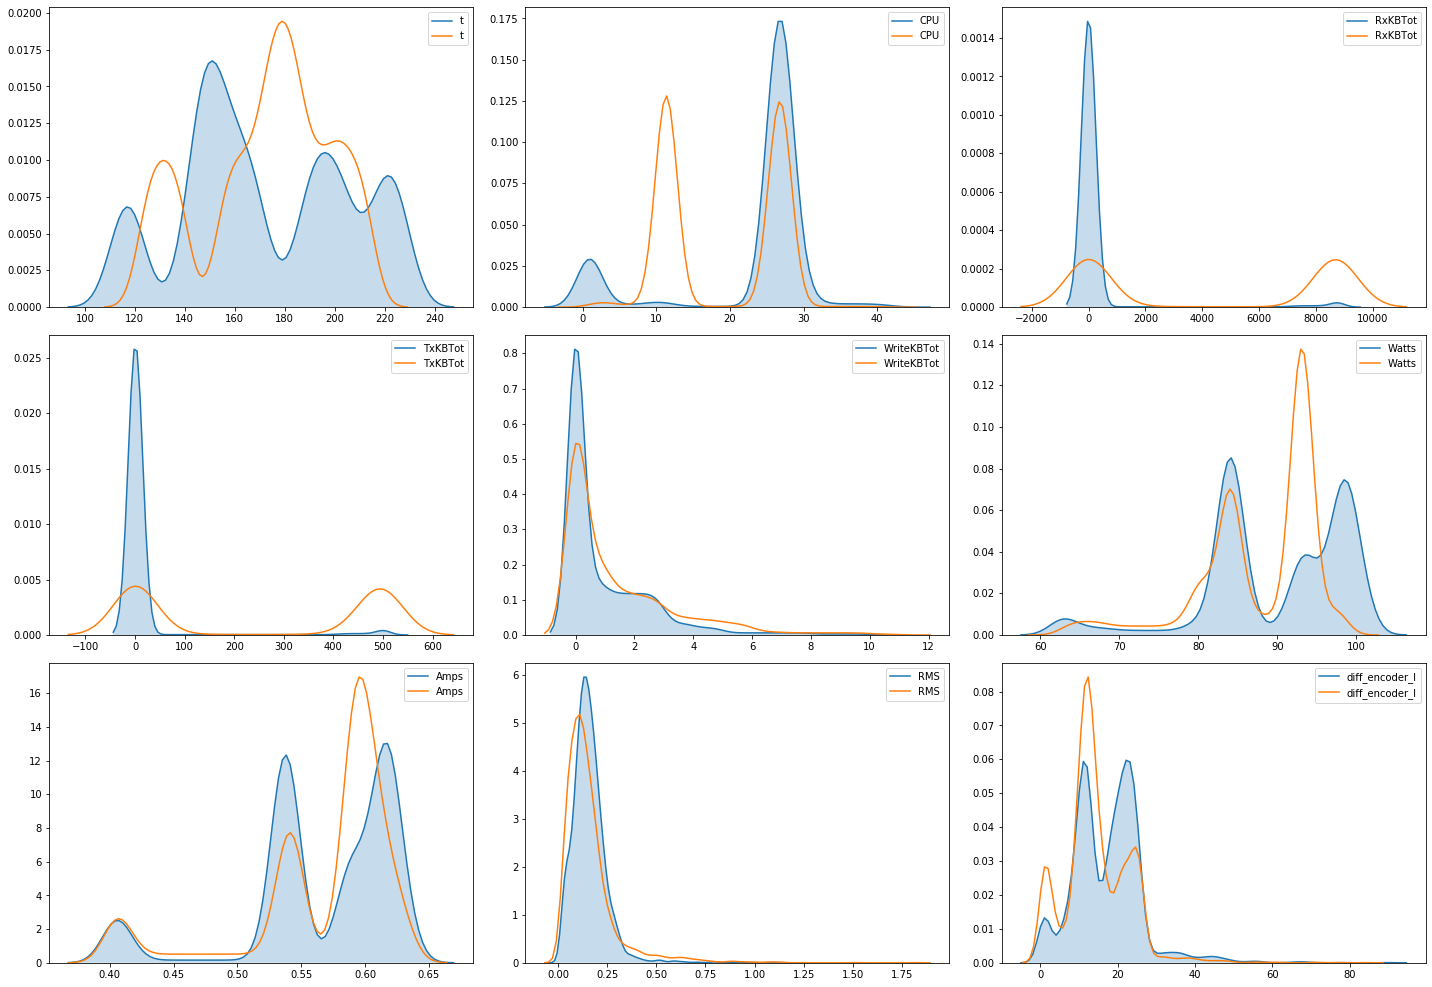

In [10]:
features = df.columns[:-1]

plt.figure(figsize=(20,50))
i=1
for feature in features:
    plt.subplot(11,3,i)
    sns.kdeplot(normal[feature], shade= True)
    sns.kdeplot(anomaly[feature], shade= False)
    i=i+1
    plt.tight_layout()
plt.show()



In [11]:
# Data_norm3 = MinMaxScaler().fit_transform(df.iloc[:,:-1])
# Data_norm3 = pd.DataFrame(Data_norm)
# Data_norm3


In [12]:
columns1 = ['t', 'CPU', 'RxKBTot', 'TxKBTot', 'WriteKBTot', 'Watts', 'Amps', 'RMS',
       'diff_encoder_l']
columns = [0, 1, 2, 3]

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn import metrics


Data_norm = MinMaxScaler().fit_transform(df.iloc[:,:-1])
Data_norm = pd.DataFrame(Data_norm)
Data_norm['flag'] = df['flag']
normal = Data_norm.loc[Data_norm['flag'] == 0, :]
fraud = Data_norm.loc[Data_norm['flag'] == 1, :]

# Data = Data_norm.sample(frac = .5, random_state = 42)
X = Data_norm.loc[:,columns]
y = Data_norm['flag']
print(X.shape)
print(y.shape)
# X.loc[1]

# df = df.drop(columns=['flag'])

(8936, 4)
(8936,)


In [13]:
from sklearn.model_selection import train_test_split

# df_train, df_test = train_test_split(X, test_size=0.2, random_state=123)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [14]:
data1= {'0':[0.000172], '1':[0.648571], '2':[0.000200], '3':[0.002441]} 
p = pd.DataFrame(data1)   
p 

# for later use

,0,1,2,3
0,0.000172,0.648571,0.0002,0.002441


In [20]:
from sklearn.cluster import KMeans

clustering_kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=800,
    n_clusters=2, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=None)

clustering_kmeans.fit(X_train)
y_pred = clustering_kmeans.predict(X_train)

n_errors = (y_pred != y_train).sum()
print("Train Set")
print(classification_report(y_train,y_pred))
print("number of errors: {}".format(n_errors))
print(pd.crosstab(y_train, y_pred))


Train Set
              precision    recall  f1-score   support

           0       0.63      0.97      0.76      3321
           1       0.95      0.50      0.66      3827

    accuracy                           0.72      7148
   macro avg       0.79      0.74      0.71      7148
weighted avg       0.80      0.72      0.71      7148

number of errors: 2001
col_0     0     1
flag             
0      3222    99
1      1902  1925


In [22]:
y_pred_t = clustering_kmeans.predict(X_test)

n_errors = (y_pred_t != y_test).sum()
print("Test Set")
print(classification_report(y_test,y_pred_t))
print("number of errors: {}".format(n_errors))
print(pd.crosstab(y_test, y_pred_t))

Test Set
              precision    recall  f1-score   support

           0       0.60      0.97      0.74       811
           1       0.95      0.47      0.63       977

    accuracy                           0.70      1788
   macro avg       0.78      0.72      0.69      1788
weighted avg       0.79      0.70      0.68      1788

number of errors: 539
col_0    0    1
flag           
0      787   24
1      515  462


In [23]:
# import joblib
# filename = 'finalized_model.sav'
# joblib.dump(clustering_kmeans, filename)

In [16]:
import pickle

pickle.dump(clustering_kmeans, open('model.pkl','wb'))



In [17]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict(p))

[0]


In [18]:
y_new = clustering_kmeans.predict(p)
y_new[0]

0

In [50]:
# n_errors
# print(classification_report(y,y_pred))
# print("number of errors: {}".format(n_errors))
# print(pd.crosstab(y, y_pred)) 

In [51]:
# fraud.shape
# #isolation forest n_estimators=155, max_samples=len(X), 
# #contamination=.00194,random_state=42, verbose=0

In [24]:
classifiers = {
    "ISOLATION FOREST":IsolationForest(n_estimators=155, max_samples=len(X), 
contamination=.00194,random_state=42, verbose=0),
    
    "LOCAL OUTLIER FACTOR":LocalOutlierFactor(n_neighbors=1, algorithm='auto', leaf_size=230, 
                            metric='euclidean', p=1, metric_params=None, contamination=.0021),
    "ONE CLASS SVM":OneClassSVM(kernel='rbf', degree=3, gamma = 'auto', nu=0.00215, max_iter=-1)
}

In [25]:
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "LOCAL OUTLIER FACTOR":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "ONE CLASS SVM":
        clf.fit(X)
        y_pred = clf.predict(X)
    elif clf_name == "ISOLATION FOREST":    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)

    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
    # Run Classification Metrics
    print("{} number of errors: {}".format(clf_name,n_errors))
    print(pd.crosstab(y, y_pred)) 
    print('silhouette coefficient:',round(metrics.silhouette_score(Data_norm, y_pred, metric='euclidean'), 3))
    print('Adjusted Rand index   :',round(metrics.adjusted_rand_score(y, y_pred),3))
    print("Classification Report :") 
    print(classification_report(y,y_pred))

ISOLATION FOREST number of errors: 4820
col_0     0   1
flag           
0      4115  17
1      4803   1
silhouette coefficient: -0.03
Adjusted Rand index   : 0.001
Classification Report :
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      4132
           1       0.06      0.00      0.00      4804

    accuracy                           0.46      8936
   macro avg       0.26      0.50      0.32      8936
weighted avg       0.24      0.46      0.29      8936

LOCAL OUTLIER FACTOR number of errors: 4804
col_0     0   1
flag           
0      4122  10
1      4794  10
silhouette coefficient: 0.054
Adjusted Rand index   : 0.0
Classification Report :
              precision    recall  f1-score   support

           0       0.46      1.00      0.63      4132
           1       0.50      0.00      0.00      4804

    accuracy                           0.46      8936
   macro avg       0.48      0.50      0.32      8936
weighted avg       0.48